# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — квартира (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd

# меняем формат отображения пандой вещественных чисел с экспоненциального на нормальный.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

display(df.head())

df.info()

df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


В столбцах: rooms(min), ceiling_height(min), ceiling_height(max), living_area(min), kitchen_area(min), airports_nearest(min) есть некорректные данные.


 Количество дубликатов: 0


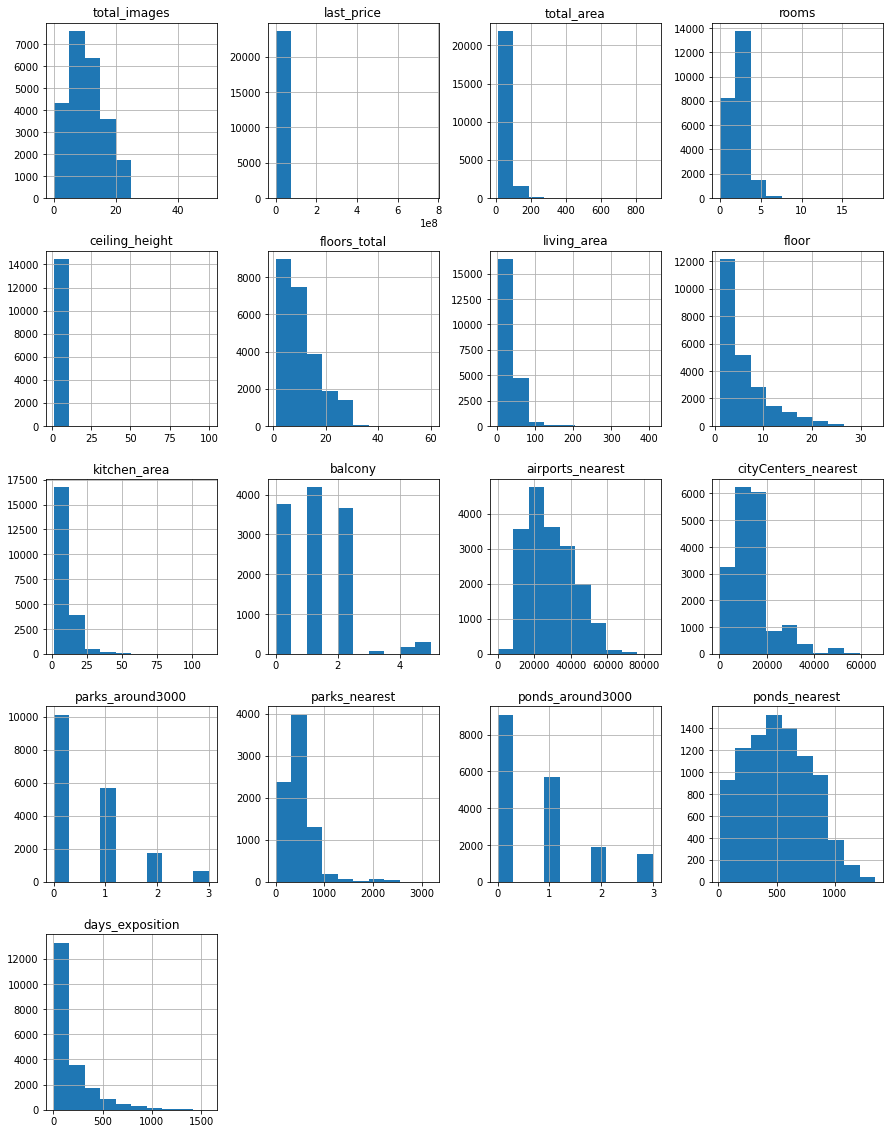

In [3]:
df.columns # проверяем название столбцов на корректность
print('\n Количество дубликатов:', df.duplicated().sum())

df.hist(figsize=(15, 20));

### Вывод:

Всего **23 699** записи.
В следующих столбцах есть пропущенные значения.
 * 5   ceiling_height        14504 non-null  float64
 * 6   floors_total          23613 non-null  float64
 * 7   living_area           21796 non-null  float64
 * 9   is_apartment          2775 non-null   object 
 * 12  kitchen_area          21421 non-null  float64
 * 13  balcony               12180 non-null  float64
 * 14  locality_name         23650 non-null  object 
 * 15  airports_nearest      18157 non-null  float64
 * 16  cityCenters_nearest   18180 non-null  float64
 * 17  parks_around3000      18181 non-null  float64
 * 18  parks_nearest         8079 non-null   float64
 * 19  ponds_around3000      18181 non-null  float64
 * 20  ponds_nearest         9110 non-null   float64
 * 21  days_exposition       20518 non-null  float64

В ряде столбцов некорректный тип данных. 


In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

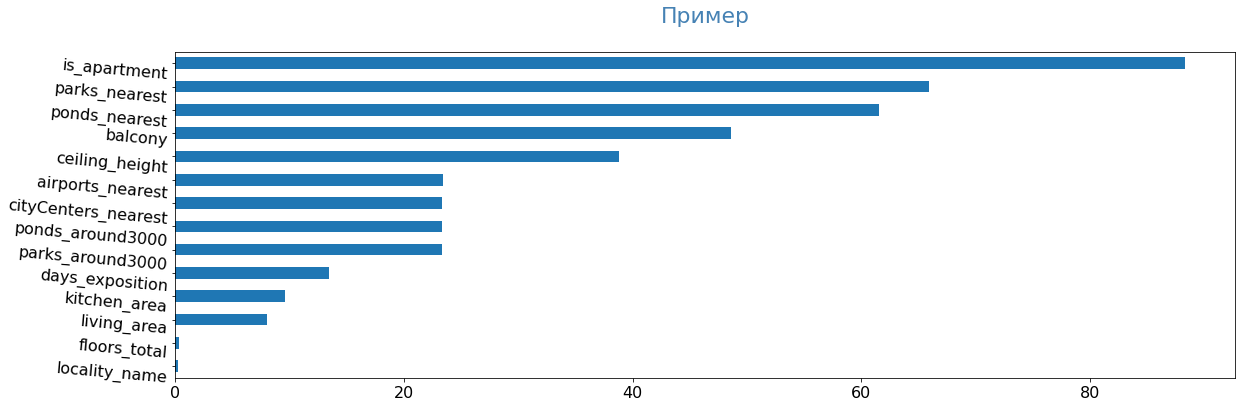

In [5]:
pass_value_barh(df)

### Предобработка данных

#### Справочно: Минимальные площади помещений квартиры:

СП 54.13330.2016 Здания жилые многоквартирные.
Актуализированная редакция СНиП 31-01-2003 
   
   5.7 Площадь квартир социального использования государственного и муниципального жилищных фондов согласно ЖК РФ должна быть не менее:
* Общей жилой комнаты в однокомнатной квартире — 14 м².
* Общей жилой комнаты в квартирах с числом комнат две и более — 16 м². 
* Спальни — 8 м² (на двух человек — 10 м²); кухни — 8 м².
* Кухонной зоны в кухне-столовой — 6 м².
* В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м².
* Согласно ст. 105 и 106 Жилищного кодекса, минимальная установленная санитарная норма составляет 6 кв. м на человека - этот нармотив будем применять для студий.

    
 https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php





#### Задаем правильный тип данных и удаляем пропущенные значения

In [6]:

# Приводим стоимость квартиры в целочисленный тип, округляем до 2 знаков.
df['last_price'] = df['last_price'].astype(int)

# Приводим дату публикации в тип "дата"

df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], yearfirst=True, format='%Y-%m-%dT%H:%M:%S'
)

# Выясняем количество значений в квартирах. Заменяем пропущенные значения.
df['is_apartment'] = df['is_apartment'].fillna(value=False)

# Приводим количество балконов в целочисленный тип. 
# Заменяем пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(value=0).astype(int)

# Приводим количество парков  в целочисленный тип. 
# Заменяем пропущенные значения на 0
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)

# Приводим количество прудов  в целочисленный тип. 
# Заменяем пропущенные значения на 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)



Посмотрим количество пропущенных значений:

In [7]:
df.isnull().sum()
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00
2,10,5196000,56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00
5,10,2890000,30.40,2018-09-10,1,NaN,12.00,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00
6,6,3700000,37.30,2017-11-02,1,NaN,26.00,10.60,6,False,...,14.40,1,посёлок Парголово,52996.00,19143.00,0,NaN,0,NaN,155.00
7,5,7915000,71.60,2019-04-18,2,NaN,24.00,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.00,11634.00,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27.00,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.00,15008.00,0,NaN,0,NaN,289.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Удаляем записи, где отсутствует этажность и локация:

In [9]:
df = df.dropna(subset=['floors_total'])
df = df.dropna(subset=['locality_name'])

Приводим этажность к целочисленному типу

In [10]:
df['floors_total'] = df['floors_total'].astype(int)

Очищаем датасет от аномально выдающихся значений:


In [11]:
# check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [12]:
df = df.query('last_price < 50000000 & \
                rooms < 5 & \
                total_area < 300 & \
                floors_total < 30')

In [13]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check.query('airports_nearest.isna() | airports_nearest < 60000')
df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check[(df_check ['airports_nearest'] < 60000) | (df_check ['airports_nearest'].isna()) ]

df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
# check
df.shape

(22935, 22)

#### Обработаем данные по жилой площади согласно нормативным минимумам:

In [16]:
def living_area_minimim(row):
    if row["rooms"] == 0 and row['living_area'] < 6:
        row['total_area'] += 6 - row['living_area']
        row['living_area']  = 6
    elif row["rooms"] == 1 and row['living_area'] < 14:
        row['total_area'] += 14 - row['living_area']
        row['living_area']  = 14
    elif row["rooms"] > 1 and row['living_area'] < 16:
        row['total_area'] += 16 - row['living_area']
        row['living_area']  = 16
    return row



In [17]:
df = df.apply(living_area_minimim, axis = 1)

Заменяем пустые значения жилой площади

In [18]:

living_ratio = df['living_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)


#### Обработаем данные по кухням и студиям:


* Согласно нормативным документам, студии - это помещения без кухни. 
* При этом, кухня - является обязательным помещением для квартир. 

* Изходя из этого проверим тождество количества объектов без кухонь с количеством студий. 
* При необходимости классифицируем объекты без кухонь как студии.

Проверим студии:

In [19]:
studios = (
    len(df.query('rooms == 0')) == len(df.query('rooms == 0 and studio == True'))
)
print("Cовпадает ли количество 0-комнатных квартир с количеством студий? Результат:", studios)

Cовпадает ли количество 0-комнатных квартир с количеством студий? Результат: False


In [20]:
# меням тип объекта на студию, если нет кухни.
df.loc[df["kitchen_area"].isnull(),'studio'] = True

In [21]:
# Заменим пропущенные значения в площади кухонь на 0.
df["kitchen_area"] = (
    df["kitchen_area"].where(~df["kitchen_area"].isnull(),0)
)

Проверим пропущенные значения:


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22935 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22935 non-null  int64         
 1   last_price            22935 non-null  int64         
 2   total_area            22935 non-null  float64       
 3   first_day_exposition  22935 non-null  datetime64[ns]
 4   rooms                 22935 non-null  int64         
 5   ceiling_height        14053 non-null  float64       
 6   floors_total          22935 non-null  int64         
 7   living_area           22935 non-null  float64       
 8   floor                 22935 non-null  int64         
 9   is_apartment          22935 non-null  bool          
 10  studio                22935 non-null  bool          
 11  open_plan             22935 non-null  bool          
 12  kitchen_area          22935 non-null  float64       
 13  balcony         

* Согласно нормативам минимальная площадь кухни в квартирах составляет 6 метров.
* Проверим: есть ли кухни меньше 5 м2 и больше 0.
* При необходимости приведем значение площади таких кухонь к нормативному минимуму.


In [23]:
df.query('(kitchen_area > 0) & (kitchen_area < 5)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000,55.10,2016-05-14,3,2.60,5,38.40,1,False,...,4.90,0,Кировск,NaN,NaN,0,NaN,0,NaN,606.00
298,9,2650000,42.80,2017-04-25,2,NaN,5,30.00,3,False,...,4.50,0,Гатчина,NaN,NaN,0,NaN,0,NaN,49.00
422,8,1700000,55.20,2018-03-24,3,2.50,5,38.50,5,False,...,4.50,0,Кириши,NaN,NaN,0,NaN,0,NaN,NaN
906,15,2600000,27.00,2017-07-10,1,2.75,23,18.00,18,False,...,2.00,0,Санкт-Петербург,22131.00,17459.00,0,NaN,1,411.00,10.00
1327,6,2650000,46.20,2016-12-01,2,2.50,5,29.20,5,False,...,4.90,0,Гатчина,NaN,NaN,0,NaN,0,NaN,704.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000,27.00,2018-11-03,1,2.70,16,15.35,6,False,...,4.00,2,Санкт-Петербург,41935.00,9551.00,0,NaN,0,NaN,35.00
22849,6,2380000,25.00,2016-03-22,1,NaN,25,19.00,15,False,...,4.00,1,посёлок Шушары,13461.00,19247.00,0,NaN,1,351.00,140.00
23110,1,2900000,34.00,2018-02-01,2,2.90,2,20.00,1,False,...,4.00,0,посёлок Стрельна,27006.00,23832.00,0,NaN,2,872.00,196.00
23498,7,1600000,54.00,2016-12-26,2,2.30,1,33.00,1,False,...,3.50,0,Высоцк,NaN,NaN,0,NaN,0,NaN,281.00


Исправляем площадь кухонь:

In [24]:
df['kitchen_area'] = (
    df['kitchen_area']
    .where(~((df['kitchen_area'] > 0) 
             & (df['kitchen_area'] < 5)), 5)
)    


#### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.

In [25]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Наблюдаем путаницу в названиях с е-ё, различное написание населенных пунктов: с указанием типа населенного пунтка и без. Унифицируем эти данные.

In [26]:


# заменяем в названиях населенных пунктов ё на е для унификации написания
df['locality_name'] = (
    df['locality_name'].str.replace('ё','е')
)


df['locality_name'] = (
    df['locality_name'].str.replace('городского типа','')
)

df['locality_name'] = (
    df['locality_name'].str.replace('городской','')
)

#Удаляем пробелы в начале строки, которые возникли после предыдущих операций
df['locality_name'] = (
    df['locality_name'].str.lstrip()
)

#заменяем двойные пробелы на одинарные
df['locality_name'] = (
    df['locality_name'].str.replace('  ',' ') 
)

df['locality_name'] = (
    df['locality_name'].replace('Кингисепп', 'поселок Кингисеппский')
)

df['locality_name'] = (
    df['locality_name'].replace('Мурино', 'поселок Мурино')
)

df['locality_name'] = (
    df['locality_name'].replace('Кудрово', 'деревня Кудрово')
)

df['locality_name'] = (
    df['locality_name'].replace('Любань', 'поселок Любань')
)    

In [27]:
# check
data = df.copy()
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.00,59.00,12.00
171,49.00,38.00,10.00
184,30.20,26.10,6.20
220,37.00,28.00,9.00
319,59.70,47.40,6.40
...,...,...,...
23216,114.00,90.20,16.00
23297,48.20,42.20,6.00
23328,54.00,40.00,10.00
23521,65.00,44.00,15.30


In [28]:
# check
df['locality_name'].nunique()

317

#### Высота потолков

* Минимальные значения высоты потолков прописаны в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.
* Применим для Санкт-Петербурга, как для северной столицы, норматив высоты потолков в 2.7м.

In [29]:
# заменяем пропущенные и меньше нормативные значения высоты потолка
df['ceiling_height'] = (
    df['ceiling_height']
    .where(~((df['ceiling_height']
              .isnull()) | (df['ceiling_height'] <2.7)), 2.7)
)    



df['ceiling_height'].unique()

array([  2.7 ,   3.03,   3.05,   2.75,   2.9 ,   2.8 ,   3.  ,   3.2 ,
         3.25,   3.45,   2.77,   4.15,   3.3 ,   2.71,   4.  ,   2.73,
         2.84,   3.1 ,   3.4 ,   3.5 ,   3.06,   2.72,   2.78,   2.76,
        25.  ,   3.7 ,   2.87,   2.85,   3.6 ,   2.92,   3.11,   3.13,
         3.8 ,   3.15,   3.55,   3.62,   3.12,   2.74,   2.96,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.54,   3.53,   2.83,   3.38,
         3.01,   3.65,   3.18,   3.35,   3.57,   2.82,   3.98,   3.83,
         3.52,   3.75,   3.67,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,
         8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,
         3.9 ,   3.27,  27.  ,   4.1 ,   3.95,   2.93,   3.46,  24.  ,
         3.47,   3.33,   3.63,   3.14,   3.32,  26.  ,   8.3 ,   2.98,
         2.86,   2.88,   3.17,   3.28,   3.04,   4.45,   5.5 ,   3.84,
         3.23,   3.02,   3.21,   3.78,   4.3 ,   3.39,   4.4 ,   3.22,
      

In [30]:
def ceiling_normalizer(ceiling):
    """
    Возвращает исправленную высоту потолка согласно коду:
    
    """
    try:
        if 2 <= ceiling <= 6: # если потолок от 2 метров до 5 - возрвращаем значение потолка без изменений
            return ceiling
        elif 6 < ceiling < 26: # тут возрвращаем медианное значение высоты потолка
            return (df['ceiling_height'].median()) 
        elif 26 < ceiling < 60: # если высота потолка от 23 до 50 метров - считаем за артефакт, где между цифрами пропущена запятая
            return ceiling / 10
        elif 60 < ceiling <= 10000: # тут возрвращаем медианное значение высоты потолка
            return (df['ceiling_height'].median()) 
    except:
        pass
    
    

нормализуем высоту потолка:

In [31]:
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_normalizer) 

df['ceiling_height'] = (
    df['ceiling_height']
    .where(~((df['ceiling_height'] <2.7)), 2.7)
)    

df['ceiling_height'].unique() #проверяем работу функции. Все ок.


array([2.7 , 3.03, 3.05, 2.75, 2.9 , 2.8 , 3.  , 3.2 , 3.25, 3.45, 2.77,
       4.15, 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.5 , 3.06, 2.72,
       2.78, 2.76, 3.7 , 2.87, 2.85, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15,
       3.55, 3.62, 3.12, 2.74, 2.96, 5.  , 2.79, 2.95, 4.06, 2.94, 3.54,
       3.53, 2.83, 3.38, 3.01, 3.65, 3.18, 3.35, 3.57, 2.82, 3.98, 3.83,
       3.52, 3.75, 3.67, 3.66, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08,
       3.68, 3.07, 3.37, 3.09, 3.16, 3.26, 3.34, 2.81, 3.44, 2.97, 4.37,
       3.9 , 3.27, 4.1 , 3.95, 2.93, 3.46, 3.47, 3.33, 3.63, 3.14, 3.32,
        nan, 2.98, 2.86, 2.88, 3.17, 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23,
       3.02, 3.21, 3.78, 4.3 , 3.39, 4.4 , 3.22, 5.3 , 3.56, 3.85, 3.93,
       3.42, 2.99, 4.14, 3.31, 3.88, 4.25, 3.69, 2.91, 4.7 , 2.89, 5.8 ,
       3.48, 3.49, 3.59])

In [32]:
display(df.describe().style.format({'last_price': '{}'})) # смотрим в каких еще столбцах аномалии

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22935.000000,22935.0,22935.000000,22935.000000,22934.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,17444.000000,17465.000000,22935.000000,7636.000000,22935.000000,8616.000000,19924.000000
mean,9.845171,5739585.327316329,56.930935,1.984042,2.757884,10.740615,32.437547,5.900327,9.319684,0.599433,28914.060651,14425.791984,0.452104,494.423913,0.570002,523.551184,178.124975
std,5.654191,4442252.276313979,24.694756,0.910970,0.167411,6.548955,15.676475,4.868383,5.795583,0.961974,12759.705696,8557.057204,0.731540,343.740147,0.865997,277.195356,217.115629
min,0.000000,12190.0,13.000000,0.000000,2.700000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.0,40.000000,1.000000,2.700000,5.000000,18.800000,2.000000,6.300000,0.000000,18428.000000,9702.000000,0.000000,288.750000,0.000000,303.000000,44.000000
50%,9.000000,4570000.0,51.000000,2.000000,2.700000,9.000000,30.000000,4.000000,8.800000,0.000000,27057.000000,13230.000000,0.000000,456.000000,0.000000,507.000000,94.000000
75%,14.000000,6500000.0,67.500000,3.000000,2.700000,16.000000,41.100000,8.000000,11.100000,1.000000,37434.000000,16383.000000,1.000000,616.000000,1.000000,733.000000,227.000000
max,50.000000,49900000.0,295.000000,4.000000,5.800000,29.000000,170.800000,27.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


посмотрим аномально низкие цены:

In [33]:
df.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000,42.00,2017-07-31,2,2.70,1,23.00,1,False,...,5.80,0,поселок Будогощь,NaN,NaN,0,NaN,0,NaN,233.00
6859,6,490000,40.00,2017-12-11,1,2.70,5,22.75,3,False,...,0.00,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,43.00
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,36421.00,9176.00,1,805.00,0,NaN,8.00
9581,7,450000,43.40,2018-08-31,2,2.70,5,30.30,3,False,...,5.50,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.00
10782,3,490000,29.10,2016-05-05,1,2.70,5,17.00,5,False,...,5.50,0,Сланцы,NaN,NaN,0,NaN,0,NaN,719.00
14911,5,430000,54.00,2018-06-26,2,2.70,3,30.71,3,False,...,0.00,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.00
16032,8,480000,32.00,2019-01-06,1,2.70,2,16.00,1,False,...,0.00,0,Сланцы,NaN,NaN,0,NaN,0,NaN,83.00
16219,14,450000,38.50,2018-07-11,2,2.70,2,21.89,1,False,...,0.00,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.00
16274,18,440000,40.00,2018-07-10,1,2.70,5,22.75,1,False,...,0.00,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.00
17456,7,430000,30.40,2019-04-22,1,2.70,2,16.00,1,False,...,6.00,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN


Сильно низких значений нет, а эти квартиры могут быть жильем в деревнях, в аварийном состоянии. 

Посмотрим объекты, расположенные аномально близко к аэропорт:

In [34]:
df.query('airports_nearest < 2000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,False,...,6.00,2,Санкт-Петербург,0.00,22801.00,0,NaN,0,NaN,60.00


Заменим их удаленность от аэропорта на медианное значение:

In [35]:
df.loc[(df['airports_nearest'] < 2000), 'airports_nearest'] =  df['airports_nearest'].median()

**Обработаем расстояния до парка:** примем 10 метров за минимум удаленности от парка. 
Даже если дом находится прям у парка - меловероятно, что расстояние от дома до парка будет меньше 10м, т.к. у дома должна быть придомовая территория. Заменим расстояние меньше 10м до парка на медианное значение.

In [36]:
df.loc[(df['parks_nearest'] < 10), 'parks_nearest'] =  df['parks_nearest'].median()


In [37]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир


(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,935.00","22,935.00","22,934.00","19,924.00","22,935.00","22,935.00","22,935.00","22,935.00","22,935.00"
min,0.00,13.00,2.70,1.00,"12,190.00",6.00,0.00,1.00,1.00
max,4.00,295.00,5.80,"1,580.00","49,900,000.00",170.80,100.70,27.00,29.00


In [38]:
# check
df.rooms.value_counts().to_frame()

,rooms
1,7994
2,7875
3,5740
4,1135
0,191


In [39]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22935 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22935 non-null  int64         
 1   last_price            22935 non-null  int64         
 2   total_area            22935 non-null  float64       
 3   first_day_exposition  22935 non-null  datetime64[ns]
 4   rooms                 22935 non-null  int64         
 5   ceiling_height        22934 non-null  float64       
 6   floors_total          22935 non-null  int64         
 7   living_area           22935 non-null  float64       
 8   floor                 22935 non-null  int64         
 9   is_apartment          22935 non-null  bool          
 10  studio                22935 non-null  bool          
 11  open_plan             22935 non-null  bool          
 12  kitchen_area          22935 non-null  float64       
 13  balcony         

#### Добавляем столбец со стоимостью квадратного метра (sqm_price) и приводим его в целочисленный тип

In [40]:
df['sqm_price'] = df['last_price'] / df['total_area']
df['sqm_price'] = df['sqm_price'].astype(int)

#### Добавляем столбцы дня недели, месяца и года

In [41]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year


#### Создаём функцию для заполнения нового столбца с типом этажа

In [42]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

#### Добавляем расстояние до центра города в километрах.

In [43]:
df['city_center_distance_km'] = (df['cityCenters_nearest'] / 1000).round()

### Проведем исследовательский анализ данных

Создадим отдельный датафрейм для анализа данных:

In [44]:
analysis =  df[
    ['total_area', 'living_area', 'kitchen_area', 
     'last_price', 'rooms', 'ceiling_height', 'floor', 
     'floor_type', 'floors_total', 'cityCenters_nearest', 
     'airports_nearest', 'parks_nearest', 'weekday', 'month', 'sqm_price']]

#### Проанализируем данные:

In [45]:
display(analysis.describe().style.format({'last_price': '{:.2f}'}))

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday,month,sqm_price
count,22935.000000,22935.000000,22935.000000,22935.00,22935.000000,22934.000000,22935.000000,22935.000000,17465.000000,17444.000000,7636.000000,22935.000000,22935.000000,22935.000000
mean,56.930935,32.437547,9.319684,5739585.33,1.984042,2.757884,5.900327,10.740615,14425.791984,28915.611729,494.777894,2.566252,6.404055,97279.504382
std,24.694756,15.676475,5.795583,4442252.28,0.910970,0.167411,4.868383,6.548955,8557.057204,12757.835079,343.468282,1.789662,3.493123,39298.679343
min,13.000000,6.000000,0.000000,12190.00,0.000000,2.700000,1.000000,1.000000,208.000000,6450.000000,10.000000,0.000000,1.000000,111.000000
25%,40.000000,18.800000,6.300000,3400000.00,1.000000,2.700000,2.000000,5.000000,9702.000000,18428.000000,289.000000,1.000000,3.000000,76224.000000
50%,51.000000,30.000000,8.800000,4570000.00,2.000000,2.700000,4.000000,9.000000,13230.000000,27057.500000,456.000000,3.000000,6.000000,94700.000000
75%,67.500000,41.100000,11.100000,6500000.00,3.000000,2.700000,8.000000,16.000000,16383.000000,37434.000000,616.000000,4.000000,10.000000,113549.000000
max,295.000000,170.800000,100.700000,49900000.00,4.000000,5.800000,27.000000,29.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000,848484.000000


#### Строим гистограмму по общей площади:

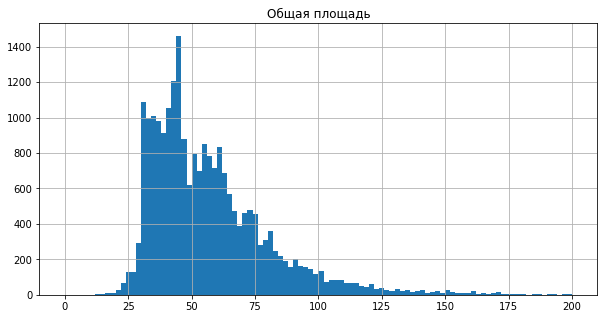

In [46]:
analysis['total_area'].hist(
    bins = 100, 
    range = (0,200), 
    figsize = (10,5), 
    label = 'total_area', 
    grid =True)
plt.title('Общая площадь');


#### Строим гистограмму по жилой площади:

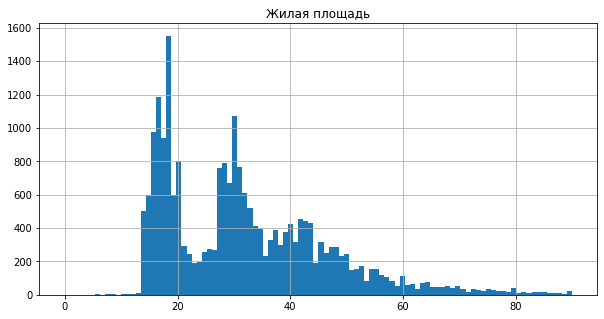

In [47]:
analysis['living_area'].hist(
    bins = 100, 
    range = (0,90), 
    figsize = (10,5), 
    label = 'living_area', grid =True)
plt.title('Жилая площадь');

#### Строим гистограмму по площади кухни:

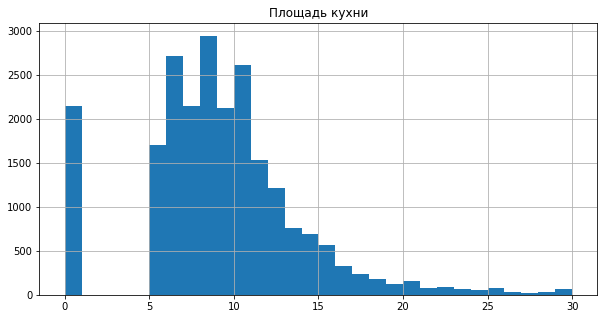

In [48]:
analysis['kitchen_area'].hist(
    bins = 30, 
    range = (0,30), 
    figsize = (10,5), 
    label = 'kitchen_area', 
    grid =True)
plt.title('Площадь кухни');

#### Строим гистограмму по цене:

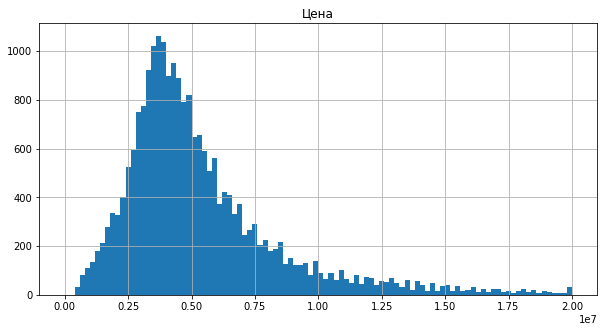

In [49]:
analysis['last_price'].hist(
    bins = 100, 
    range = (0,20000000), 
    figsize = (10,5), 
    label = 'last_price', 
    grid =True)
plt.title('Цена');

# round(df.last_price).value_counts().to_frame()

#### Строим гистограмму по количеству комнат:

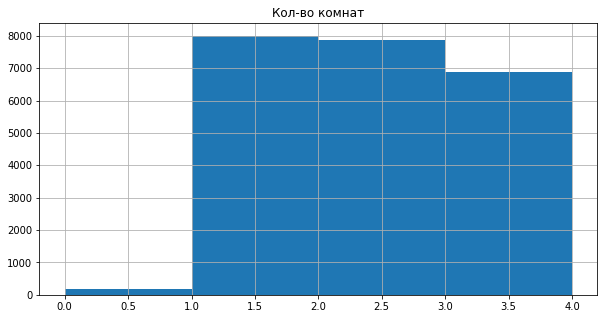

In [50]:
analysis['rooms'].hist(
    bins = 4, 
    range = (0,4), 
    figsize = (10,5), 
    label = 'rooms', 
    grid = True)
plt.title('Кол-во комнат');

#### Строим гистограмму по высоте потолка:

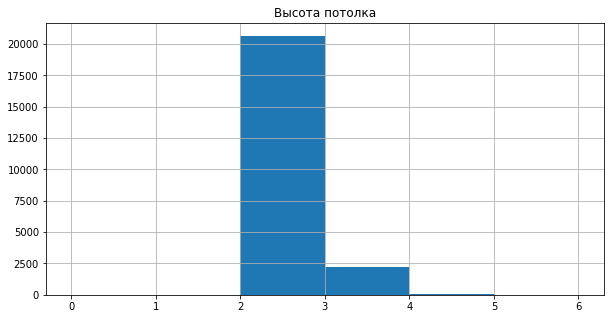

In [51]:
analysis['ceiling_height'].hist(
    bins = 6, 
    range = (0,6), 
    figsize = (10,5), 
    label = 'ceiling_height', 
    grid = True)
plt.title('Высота потолка');

#### Строим гистограмму по этажам:

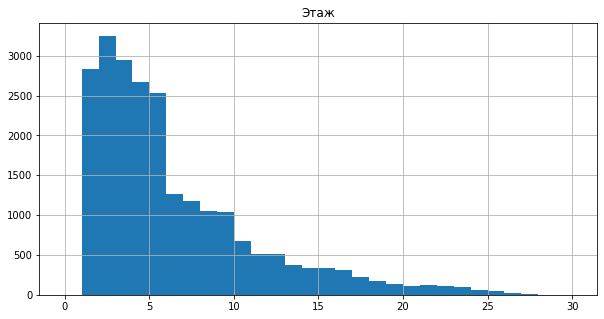

In [52]:
analysis['floor'].hist(
    bins = 30, 
    range = (0,30), 
    figsize = (10,5), 
    label = 'floor', 
    grid =True)
plt.title('Этаж');

#### Строим гистограмму по типам этажей:

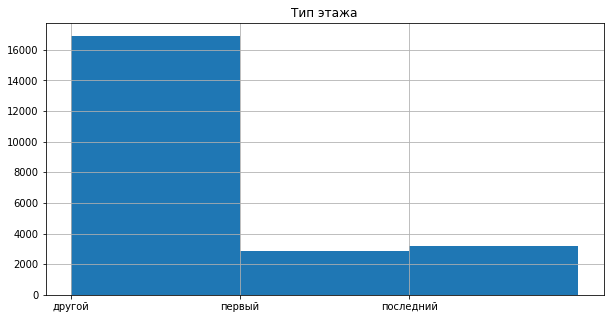

In [53]:
analysis['floor_type'].hist(
    bins = 3, 
    range = (0,3), 
    figsize = (10,5), 
    label = 'floor_type', 
    grid =True)
plt.title('Тип этажа');

#### Строим гистограмму по количеству этажей:

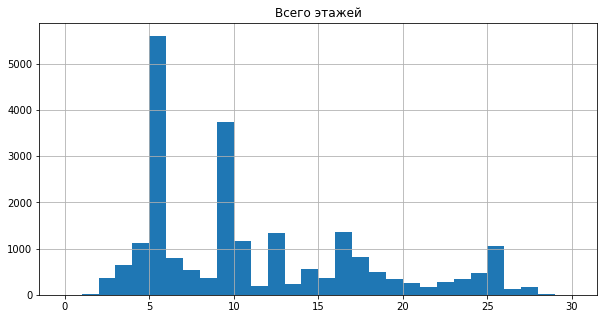

In [54]:
analysis['floors_total'].hist(
    bins = 30, 
    range = (0,30), 
    figsize = (10,5), 
    label = 'floors_total', 
    grid =True)
plt.title('Всего этажей');

#### Строим гистограмму по расстоянию до центра:

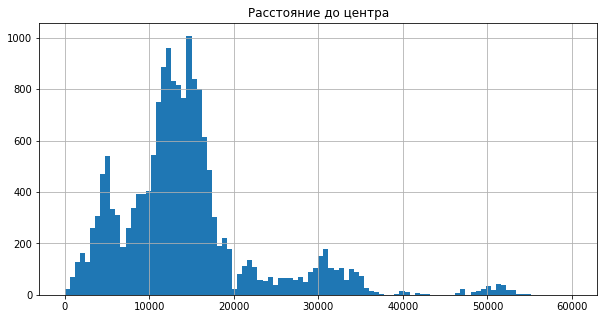

In [55]:
analysis['cityCenters_nearest'].hist(
    bins = 100, 
    range = (0,60000), 
    figsize = (10,5), 
    label = 'cityCenters_nearest', 
    grid =True)
plt.title('Расстояние до центра');

#### Строим гистограмму по расстоянию до аэропорта:

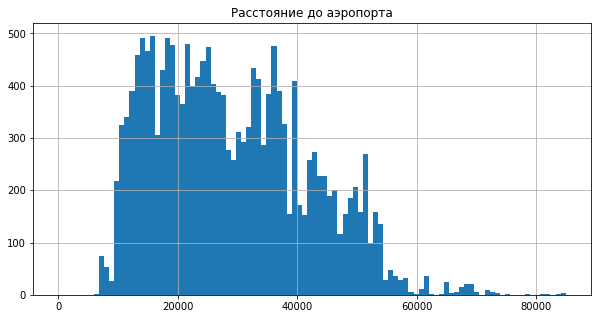

In [56]:
analysis['airports_nearest'].hist(
    bins = 100, 
    range = (0,85000), 
    figsize = (10,5), 
    label = 'airports_nearest', 
    grid =True)
plt.title('Расстояние до аэропорта');

#### Строим гистограмму по расстоянию до парка:

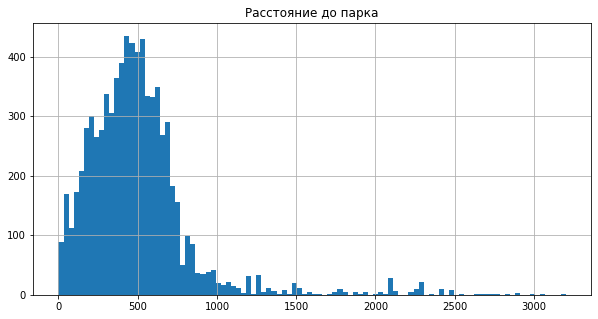

In [57]:
analysis['parks_nearest'].hist(
    bins = 100, 
    range = (0,3200), 
    figsize = (10,5), 
    label = 'parks_nearest', 
    grid =True)
plt.title('Расстояние до парка');

#### Строим гистограмму по дням недели:

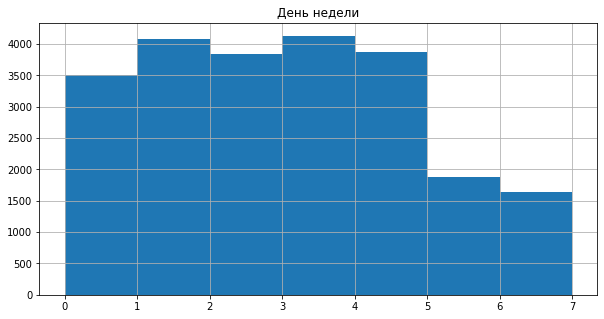

In [58]:
analysis['weekday'].hist(
    bins = 7, 
    range = (0,7), 
    figsize = (10,5), 
    label = 'weekday', 
    grid =True)
plt.title('День недели');

#### Строим гистограмму по месяцам:

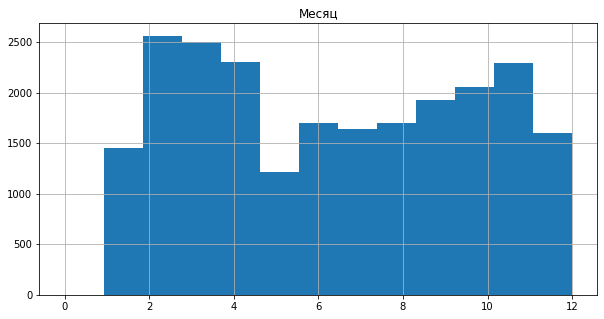

In [59]:
analysis['month'].hist(
    bins = 13, 
    range = (0,12), 
    figsize = (10,5), 
    label = 'month', 
    grid =True)
plt.title('Месяц');

#### Строим гистограмму по стоимости за м2:

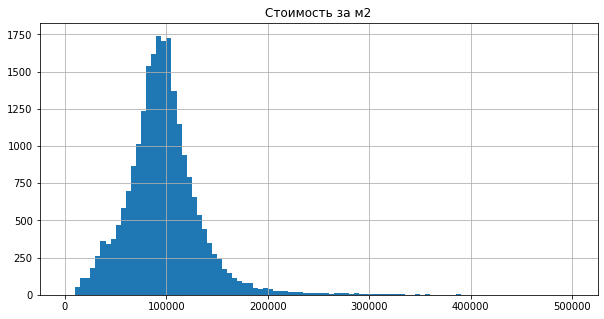

In [60]:
analysis['sqm_price'].hist(
    bins = 100, 
    range = (0,500000), 
    figsize = (10,5), 
    label = 'sqm_price', 
    grid =True)
plt.title('Стоимость за м2');

#### Вывод

In [61]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,city_center_distance_km
count,22935.00,22935.00,22935.00,22935.00,22934.00,22935.00,22935.00,22935.00,22935.00,22935.00,...,22935.00,7636.00,22935.00,8616.00,19924.00,22935.00,22935.00,22935.00,22935.00,17465.00
mean,9.85,5739585.33,56.93,1.98,2.76,10.74,32.44,5.90,9.32,0.60,...,0.45,494.78,0.57,523.55,178.12,97279.50,2.57,6.40,2017.38,14.42
std,5.65,4442252.28,24.69,0.91,0.17,6.55,15.68,4.87,5.80,0.96,...,0.73,343.47,0.87,277.20,217.12,39298.68,1.79,3.49,1.03,8.57
min,0.00,12190.00,13.00,0.00,2.70,1.00,6.00,1.00,0.00,0.00,...,0.00,10.00,0.00,13.00,1.00,111.00,0.00,1.00,2014.00,0.00
25%,6.00,3400000.00,40.00,1.00,2.70,5.00,18.80,2.00,6.30,0.00,...,0.00,289.00,0.00,303.00,44.00,76224.00,1.00,3.00,2017.00,10.00
50%,9.00,4570000.00,51.00,2.00,2.70,9.00,30.00,4.00,8.80,0.00,...,0.00,456.00,0.00,507.00,94.00,94700.00,3.00,6.00,2017.00,13.00
75%,14.00,6500000.00,67.50,3.00,2.70,16.00,41.10,8.00,11.10,1.00,...,1.00,616.00,1.00,733.00,227.00,113549.00,4.00,10.00,2018.00,16.00
max,50.00,49900000.00,295.00,4.00,5.80,29.00,170.80,27.00,100.70,5.00,...,3.00,3190.00,3.00,1344.00,1580.00,848484.00,6.00,12.00,2019.00,66.00


**Общая площадь:**
БОльшая часть квартир в районе 40-51 метров.
Середное значение площади состовляет 54м2, а ее медиана 50 м2.

**Жилая площадь:**
Наиболее распоротранена жилая площадь в районе 18м2.
Среднее значение жилой площади составляет 32.4м2, а ее медиана - 30 м2.
Максимальное значение жилой площади - 170.

**Кухня:**
Наиболее распоротранена площадь кухни в районе 8м2.
Среднее значение жилой площади кухни составляет 9.3м2, а ее медиана - 8.8 м2.

**Цена:**
Наиболее распоротраненная цена в районе 4.5 млн рублей.
Средня цена составляет 5.7 млн рублей, медианная - 5.7 млн рублей.
Максимальная цена 49.9 млн рублей.

**Комнаты:**
Средное значение количества комнат состовляет 1.98 и ее медиана 2.

**Высота потолков:**
Середное значение высоты потолков состовляет 2,76м  и ее медиана 2,70.

**Этаж объекта:**
Среднее значение этажа продаваемых объектов 5.9, медиана - 4 этажа. Максимум - 27 этаж.

**Тип этажа:**
Последний этаж встречается чуть чаще первого, а все остальные этажи в объявлениях ожидаемо значительно опережают первые и последние этажи вместе взятые.

**Этажей в здании расположения объекта:**
Средняя высота здания, где расположен продаваемый объект - 10.7 этажей. Медианная этажность - 9. А максимум - 29 этажей.

**Расстояние до центра города:**
Большая часть объектов находится на расстоянии 16 км от центра города, в среднем расстояние до центра составляет 14,7 км, медианное значение 13 км.

**Расстояние до ближайшего аэропорта:**
Минимальная удаленность от аэропорта - 6.4 км, что неожиданно дало.
Средняя удаленность от аэропорта 28.7км. Медианное значение - 26,7 км.

**Расстояние до ближайшего парка:**
Средняя удаленность от парка 490 метров, медианная удаленность - 456 метров, а максиум 3.1 км.

**День публикации объявления:**
Чаще всего объявления публикуют в четрверг, а реже всего по выходным. 

**Месяц публикации объявления:**
Чаще всего объявления публикуют в ноябре, реже всего в мае. Видимо влияют майские праздники.

**Стоимость за квадратный метр:**
Средняя стоимость квадратного метра составляет 97 000 рублей. Медианное значение 94 700, а максимальная стоимость 848 000 рублей. При этом абсолютное большинство квартир находится в пределе 200 000 рублей за м2, т.к. третий квартиль это всего лишь 110 473 рублей за м.2


### Время продажи квартиры


Строим гистограмму, с укороченным диапазоном до 100 дней, чтобы детально рассмотреть пики.

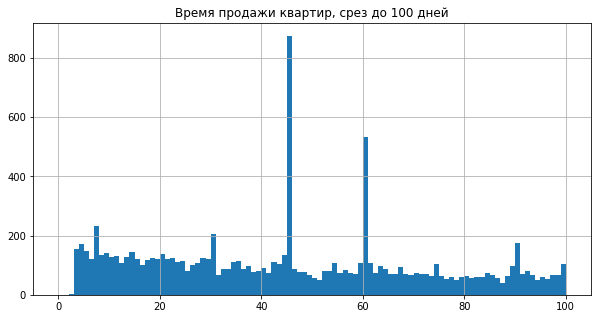

In [62]:
(
    df['days_exposition']
    .hist(bins =  100, 
          range = (0,100), 
          figsize = (10,5), 
          label = 'days_exposition', 
          grid =True)
)
    
plt.title('Время продажи квартир, срез до 100 дней');

Строим гистограмму, с укороченным диапазоном до 600.

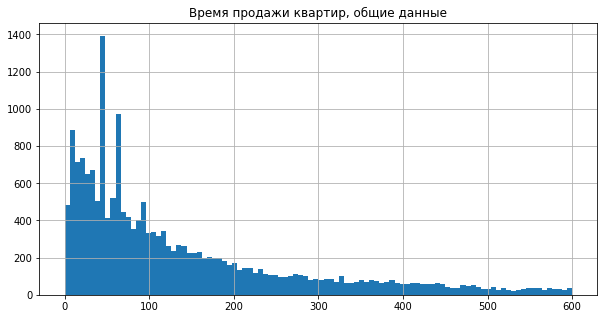

In [63]:
(
    df['days_exposition']
    .hist(bins =  100,
          range = (0,600), 
          figsize = (10,5), 
          label = 'days_exposition', 
          grid =True)
)
plt.title('Время продажи квартир, общие данные')
plt.show()

Смотрим срок публикации объявления

In [64]:
df['days_exposition'].describe()

count   19924.00
mean      178.12
std       217.12
min         1.00
25%        44.00
50%        94.00
75%       227.00
max      1580.00
Name: days_exposition, dtype: float64

#### Вывод по времени продажи квартиры


В гистограмме наблюдается три пика снятия из публикации, в 45, 60 дней. Вероятно они обусловлены особенностями работы сайта объявлений и указывают на стандартные сроки оканчания срока публикации. 

Из полученных данных можно заключить, что обычно продажа квартиры занимет 95 дней (Это медианное значение). 
Быстрая продажа квартиры - это продажа за 42 дня.
Долгая продажа - дольше 214 дней. 

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Создадим датафрейм для анализа цены:
    

In [65]:
price_analysis = df[[
    'total_area', 
    'last_price', 
    'sqm_price', 
    'living_area',
    'kitchen_area',
    'rooms',
    'floor',
    'weekday',
    'month',
    'year'
]]

Построим матрицу кореляции данных:

              total_area  last_price  sqm_price  living_area  kitchen_area  \
total_area          1.00        0.76       0.21         0.92          0.50   
last_price          0.76        1.00       0.73         0.65          0.50   
sqm_price           0.21        0.73       1.00         0.11          0.29   
living_area         0.92        0.65       0.11         1.00          0.29   
kitchen_area        0.50        0.50       0.29         0.29          1.00   
rooms               0.75        0.43      -0.04         0.84          0.18   
floor              -0.01        0.07       0.17        -0.09          0.12   
weekday            -0.01       -0.01      -0.01        -0.01         -0.03   
month               0.01        0.01      -0.00         0.01          0.01   
year               -0.08       -0.04       0.03        -0.07         -0.06   

              rooms  floor  weekday  month  year  
total_area     0.75  -0.01    -0.01   0.01 -0.08  
last_price     0.43   0.07    -0.01   0

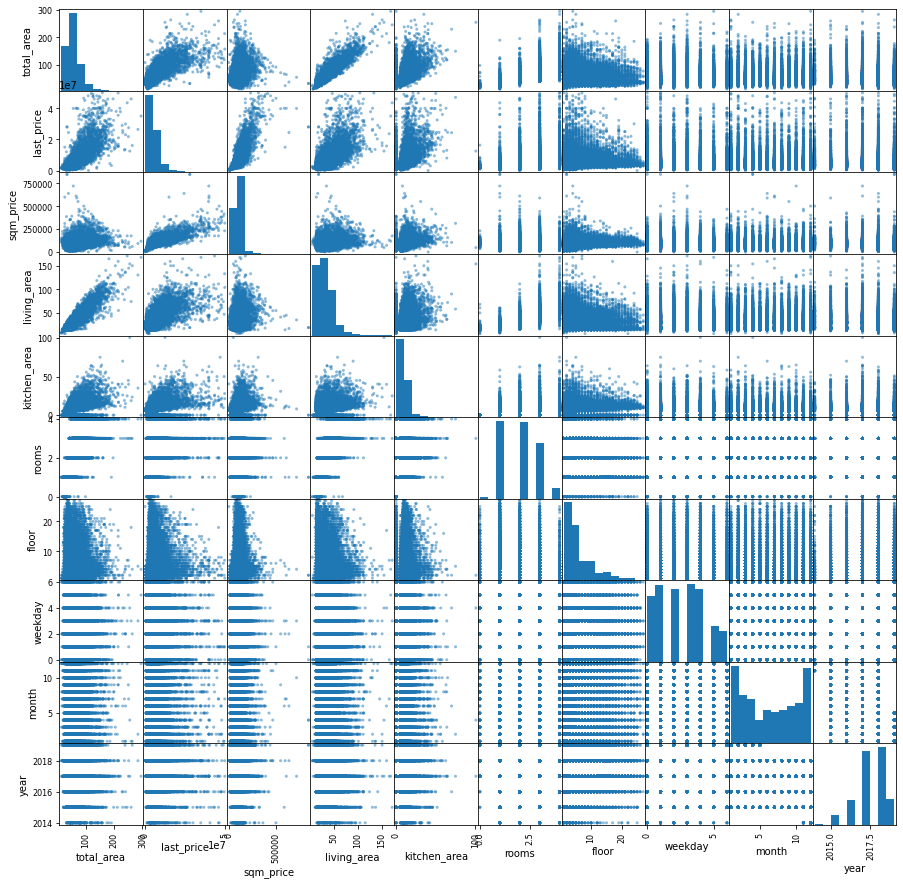

In [66]:
print(price_analysis.corr())
pd.plotting.scatter_matrix(price_analysis, figsize=(15, 15));

Посмотрим график и значения корреляции для каждого возможного фактора влияющего на цену:

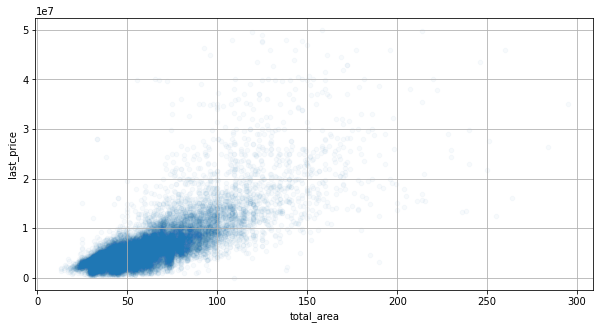

Коэффициент корреляции last_price и total_area: 0.76


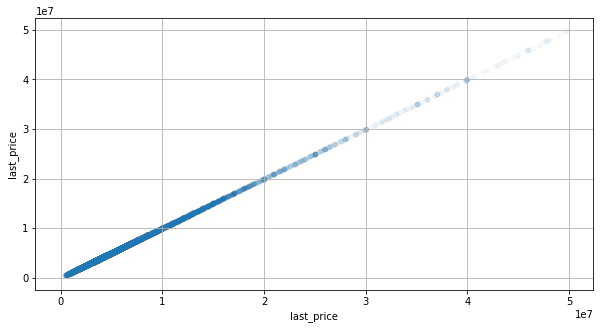

Коэффициент корреляции last_price и last_price: 1.0


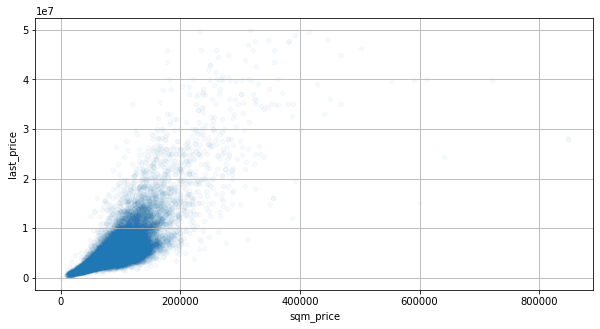

Коэффициент корреляции last_price и sqm_price: 0.73


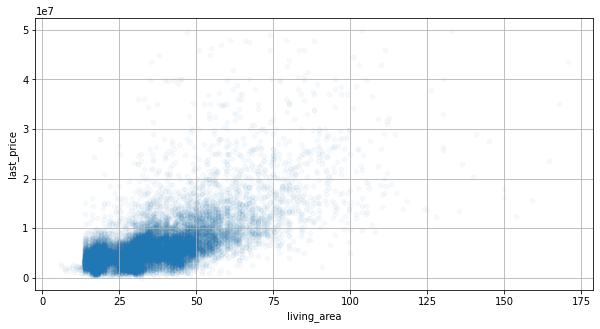

Коэффициент корреляции last_price и living_area: 0.65


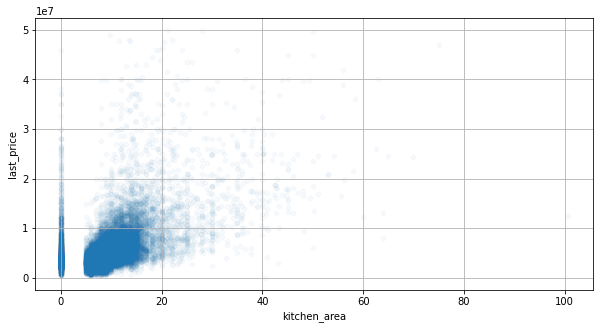

Коэффициент корреляции last_price и kitchen_area: 0.5


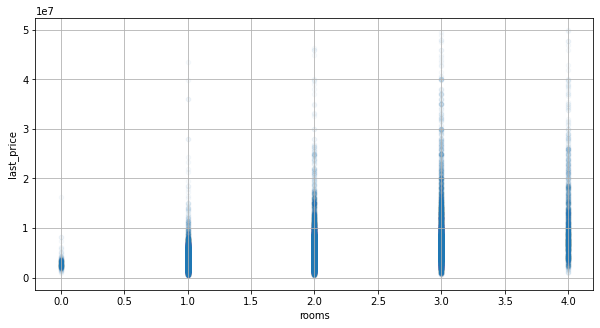

Коэффициент корреляции last_price и rooms: 0.43


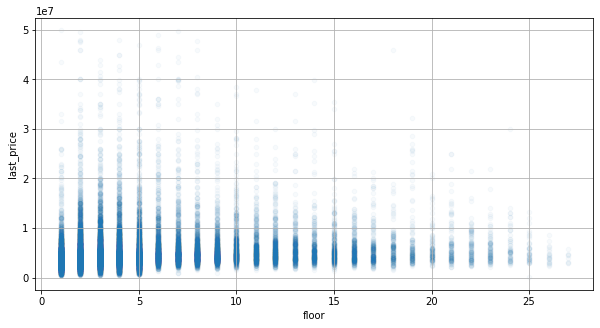

Коэффициент корреляции last_price и floor: 0.07


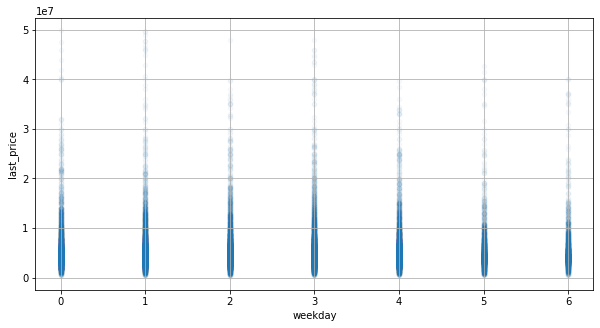

Коэффициент корреляции last_price и weekday: -0.01


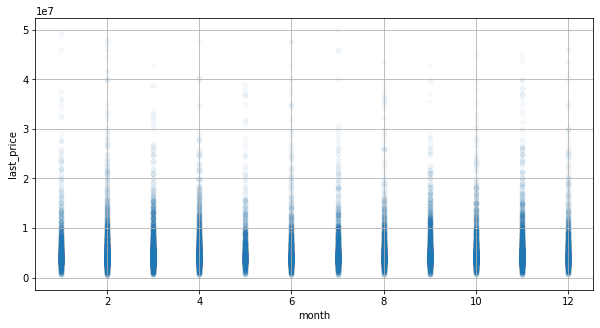

Коэффициент корреляции last_price и month: 0.01


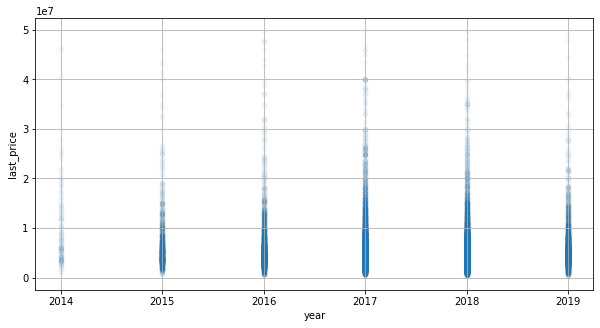

Коэффициент корреляции last_price и year: -0.04


In [67]:
for column in price_analysis:
    price_analysis.plot(
        x =  column, 
        y = 'last_price', 
        kind = 'scatter', 
        alpha=0.03, 
        figsize = (10,5), 
        sharex = False, 
        grid= True)
    corelation = price_analysis[
        'last_price'].corr(price_analysis[column]).round(2)
    plt.show()
    print('Коэффициент корреляции last_price и {}: {}'
          .format(column, corelation))   
    


#### Вывод



* Цена объекта в большой мере зависит от общей площади - коэффициент корреляции - 0.76, а не от количества комнат - коэффициент корреляции 0.43. 
* Поскольку общая площадь состоит в основном из жилой площади - то и связь величины жилой площади и стоимости квартиры тоже довольно значительная, коэффициент корреляции - 0.65
* Связь цены и этажа размещения объекта, а также даты размещения мы исследуем далее.

#### Зависимость цены от этажа.

Сводная таблица количества этажей и общей цены

In [68]:
floor_data = df.pivot_table(
    index = 'floor_type', 
    values = ['last_price'], 
    aggfunc = ['mean']).round()

floor_data.columns = ['mean_last_price']

floor_data.rename(
    columns={'floor_type':'Тип этажа', 
             'mean_last_price':'Средняя цена продажи'}, 
    inplace=True)

floor_data

,Средняя цена продажи
floor_type,
другой,6010512.00
первый,4434929.00
последний,5466380.00


Гистограма общей цены по расположению по этажам

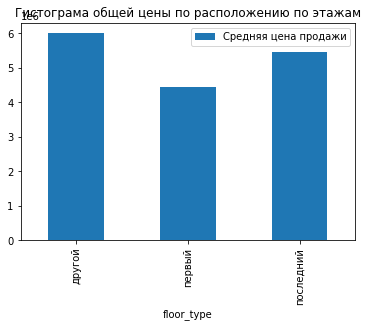

In [69]:
floor_data.plot(kind = 'bar', legend = 'reverse')
plt.title('Гистограма общей цены по расположению по этажам');

In [70]:
# check
floor_data = df.pivot_table(index = 'floor_type' , values = ['sqm_price', 'last_price'], aggfunc = ['mean']).round()
floor_data 

mean          
           last_price sqm_price
floor_type                     
другой     6010512.00 101589.00
первый     4434929.00  80927.00
последний  5466380.00  89024.00

#### Вывод по зависимости цены от этажа.

* Жилые помещения на первом этаже стоят дешевле всего. Если бы мы не исключили выдающиеся значения, под которые подпадают пентхаусы, то разница в цене между первым и последним этажем была бы еще выше. В нормальных же случаях в цене выше помещения на других этажах.

#### Зависимость от даты размещения: дня недели, месяца и года.

График средней цены объектов по годам публикаций

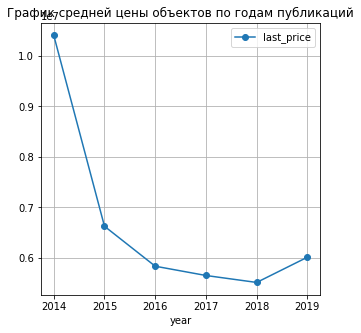

In [71]:
(
    df.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('График средней цены объектов по годам публикаций');

Наблюдаем аномальный всплеск цены в 2014 году, проверим количество объявлений по годам:

In [72]:
df.groupby('year')['year'].count()

year
2014     129
2015    1097
2016    2662
2017    7941
2018    8314
2019    2792
Name: year, dtype: int64

Как и ожидалось - в 2014 году слишком мало объявлений, поэтому данные за эти год не очень репрезентативные.

График средней цены объектов недвижимости по месяцам публикаций

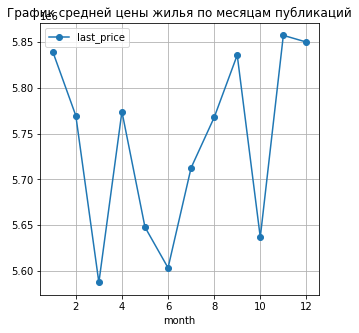

In [73]:
(
    df.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('График средней цены жилья по месяцам публикаций');


График средней цены недвижимости по дням публикаций

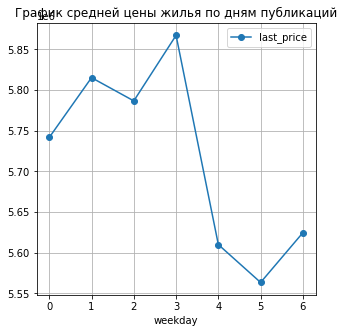

In [74]:
(
    df.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('График средней цены жилья по дням публикаций');

#### Вывод по дате публикации:

* Резкое падение средней цены на жилье в 2014 году обусловлено малым количеством объявлений, в действительности падение было бы более плавным, т.к. средняя цена жилья в объявлениях в 2014г. была бы ниже. В целом, падение средней цены продолжалось с 2014 год по 2018. 
* Наиболее высокие цены в ноябре, а наименьшая в марте.
* Наибольшая цена в объявлениях размещенных в среду, а наименьшая - в размещенных в субботу. Не стоит продавать квартиры сразу после пятничных вечеринок!

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Сгруппируем данные по городу, посчитаем количество объектов недвижимости и среднею стоимость м2.

In [75]:
loc_name_pivot_table = (
    df.pivot_table(
        index = 'locality_name', 
        values = ["sqm_price"], 
        aggfunc = ["count","mean"]))

loc_name_pivot_table.columns = ["count","mean"]

loc_name_pivot_table.sort_values(
    by = "count", 
    inplace = True, 
    ascending = False)

loc_name_pivot_table = loc_name_pivot_table[:10].rename(
    columns={'count':'Кол-во', 
             'mean':'Средняя цена'})

loc_name_pivot_table


,Кол-во,Средняя цена
locality_name,,
Санкт-Петербург,15066,112163.52
поселок Мурино,584,85937.58
деревня Кудрово,470,95154.85
поселок Шушары,437,78398.62
Всеволожск,398,68615.15
Пушкин,363,103029.70
Колпино,335,75399.34
поселок Парголово,326,90054.40
Гатчина,306,68795.72


Выведем город с самой высокой средней стоимостью жилья:

In [76]:
loc_name_pivot_table.sort_values('Средняя цена', ascending=True).tail(1)

,Кол-во,Средняя цена
locality_name,,
Санкт-Петербург,15066,112163.52


Выведем город с самой низкой средней стоимостью жилья:

In [77]:
loc_name_pivot_table.sort_values('Средняя цена', ascending=False).tail(1)


,Кол-во,Средняя цена
locality_name,,
Выборг,236,58125.29


#### Вывод по цене м2 в 10 населенных пунктах

* Самая высокая средняя стоимость квадратного метра находится в Санкт - Петербурге.
* Самая низкая средняя стоимость квадратного метра в Выборге.

#### Влияние расстояния от центра на стоимость жилья в Санкт-Петербурге

Выделим объявления относящиеся к Петербургу в отдельный датафрейм:

In [78]:
spb_only = df.query('locality_name == "Санкт-Петербург"')

Рассчитаем среднюю цену в зависимости от отдаления от центра:

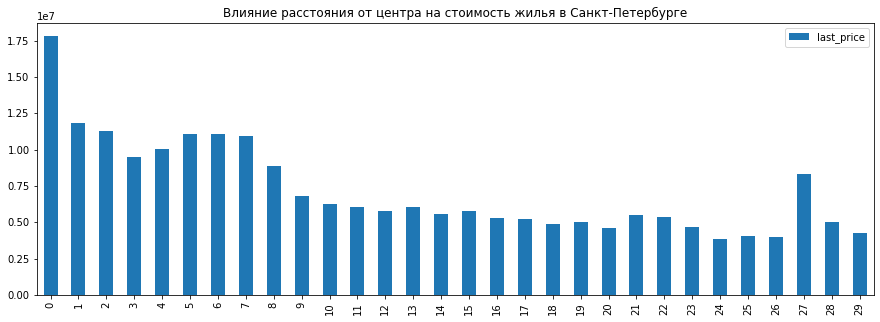

In [79]:
spb_only_km_center = spb_only.pivot_table(
    index = 'city_center_distance_km',
    values = 'last_price', 
    aggfunc = 'mean')

spb_only_km_center = spb_only_km_center.astype('int')

spb_only_km_center['km'] = spb_only_km_center.index
spb_only_km_center.reset_index(drop = True, inplace = True)
spb_only_km_center.plot(
    y = "last_price", 
    style = 'o', 
    kind = 'bar', 
    figsize = (15,5))
plt.title('Влияние расстояния от центра на стоимость жилья в Санкт-Петербурге');

Выведем на экран табличку со средней стоимостью м2 в зависимости от удаления от центра.

In [80]:
spb_only_km_center.head(29)

,last_price,km
0,17810742,0.00
1,11828417,1.00
2,11257008,2.00
3,9502076,3.00
4,10067499,4.00
5,11074948,5.00
6,11059603,6.00
7,10965368,7.00
8,8911055,8.00
9,6810941,9.00


#### Вывод

* В целом, чем дальше от центра - тем дешевле. Неожиданные всплески цены можно объяснить элитными районами \ жилищными кварталами \ питерскими рублевками, находящимся на некотором удалении от центра. 

### Общий вывод

1. БОльшая часть жилья продаваемого жилья имеет площадь в районе 40-50 метров. 
2. Общая площадь квартиры и общая стоимости имеют прямую зависимости, то есть при увеличении общей площади увеличивается ее общая стоимость, при этом стоимость за квадратный метр уменьшается.
3. С 2014 год по 2018 шло падение цены на жилье, а с 2018 по 2019 рост.
4. Объявления о покупке жилья стоит смотреть по субботам (марта), т.к. у размещенных в этот день объявлений наиболее низкая цена.
5. Чаще встречаются 1-комнатные и 2-комнатные квартиры.
6. В основном объекты недвижимости продаются в течение 95 дней.
7. Где-то, в районе 27 км от центра Питера, есть очень крутое место для жизни.